In [1]:
# Imports
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras import utils
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [2]:
# Optimization of data
# plt.imshow(Image.fromarray(x_train[1]))

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# magic
model = Sequential()
model.add(Dense(800, input_dim=784, 
                use_bias = True, 
                activation = 'relu'
                ))
model.add(Dropout(0.3))
model.add(Dense(400, 
                use_bias = True, 
                activation = 'relu'
                )) 
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
log = model.fit(x_train, y_train, validation_split = 0.2, batch_size=128, epochs=15, verbose=0)
model.save_weights('Number_resolver.h5')

Final accuracy on test batch is 98%
Enter description: default and dropouts-0.3


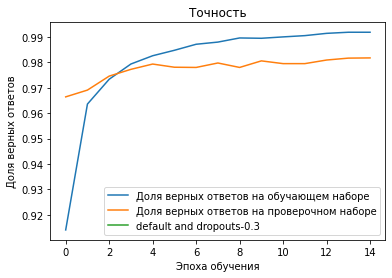

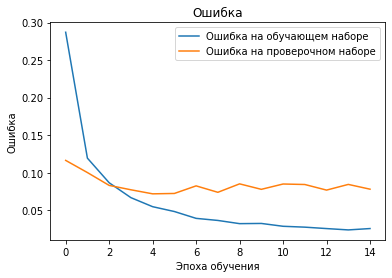

In [28]:
# Analyzing logs
def model_analyze(log):
  # model = keras.model.load_model(path)

  print('Final accuracy on test batch is ', round(log.history['val_accuracy'][-1]*100), '%', sep = '')
  descr = input('Enter description: ')
  if (descr == ''): descr = 'plot'
  plt.plot(log.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
  # Выводим график точности на проверочной выборке
  plt.plot(log.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.plot([], label = descr)
  

  # Выводим подписи осей
  plt.title("Точность")
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  # plt.legend([None], 'Вот это аннотация')


  # Выводим легенду
  plt.legend()
  plt.savefig(descr + '.png')
  plt.show()

  plt.plot(log.history['loss'], label='Ошибка на обучающем наборе')
  plt.plot(log.history['val_loss'], label='Ошибка на проверочном наборе')
  plt.title("Ошибка")
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.show()

model_analyze(log)

In [5]:
# Testing

# t = 1234
# plt.imshow(Image.fromarray(x_test[t].reshape(28, 28) * 256))
# print('We expect ', np.argmax(y_test[t]))
# x = np.expand_dims(x_test[t], axis = 0)
# print('We get ', np.argmax(model.predict(x)))

# from tensorflow.keras.preprocessing import image
# pic = image.load_img('two.png', color_mode = 'grayscale')
# pic = image.img_to_array(pic)
# pic = (255 - pic)/255
# pic = pic.reshape(1, 784)

# print('We get ', np.argmax(model.predict(pic)))



800-400-relu-relu: 0.98<br>
800-400-relu-relu-NoBias: 0.9803<br>
800-400-none-none: 0.9259 - Дерганые графики проверочного набора, переобучения не наблюдается<br>
800-400-none-none-NoBias: 0.9179 - см. с bias